In [1]:
#imports
import numpy as np
import pandas as pd
from tqdm import tqdm
import scipy.signal as signal #signal processing stuff (e.g. filters, hilbert transform, etc.)
import scipy
import struct
import os
#plotting!
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
import nelpy.plotting as npl
import nelpy.io.trodes as neltro
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib.ticker import AutoMinorLocator
#nelpy!
import nelpy as nel
import nelpy.plotting as npl
#make the svg
import svgutils.transform as sg
import sys
from IPython.display import SVG, display, Image
sns.set(rc={'figure.figsize': (12, 4),'lines.linewidth': 1, 'font.size': 18, 'axes.labelsize': 16, 'axes.titlesize':18, 'legend.fontsize': 12, 'ytick.labelsize': 12, 'xtick.labelsize': 12 })
sns.set_style('white')
sns.set_color_codes(palette='colorblind')
#plots show up within jupyter for matplotlib
%matplotlib inline 

/home/shayok/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/shayok/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/shayok/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/shayok/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
/home/shayok/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88


# Load up data and generate figures!

In [476]:
sigmuhz = np.arange(1.5,10.25,0.25)
# detectionLatencyCalc = []
# relativeDetectionLatencyCalc =[]
# fpRateCalc = []
# tpRateCalc = []
# # fpPercentCalc = []
# for z in tqdm(sigmuhz):
#     OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/detectionLatency" + str((int)(z*100)) + ".out" 
#     detectionLatencyCalc.append(np.loadtxt(OPENME))
#     OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/relativeDetectionLatency" + str((int)(z*100)) + ".out" 
#     relativeDetectionLatencyCalc.append(np.loadtxt(OPENME))
#     OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/fpRate" + str((int)(z*100)) + ".out" 
#     fpRateCalc.append(np.loadtxt(OPENME))
#     OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/tpRate" + str((int)(z*100)) + ".out" 
#     tpRateCalc.append(np.loadtxt(OPENME))
# #     OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/fpPercent" + str((int)(z*100)) + ".out" 
# #     fpPercentCalc.append(np.loadtxt(OPENME))
# detectionLatencyCalc = np.asarray(detectionLatencyCalc)
# relativeDetectionLatencyCalc = np.asarray(relativeDetectionLatencyCalc)
# fpRateCalc = np.asarray(fpRateCalc)
# tpRateCalc = np.asarray(tpRateCalc)
# # fpPercentCalc = np.asarray(fpPercentCalc)

# detectionLatencyCalc2 = []
# relativeDetectionLatencyCalc2 = []
# fpRateCalc2 = []
# tpRateCalc2 = []
# # fpPercentCalc2 = []
# for z in tqdm(sigmuhz):
#     OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/twoChan/detectionLatency" + str((int)(z*100)) + ".out" 
#     detectionLatencyCalc2.append(np.loadtxt(OPENME))
#     OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/twoChan/relativeDetectionLatency" + str((int)(z*100)) + ".out" 
#     relativeDetectionLatencyCalc2.append(np.loadtxt(OPENME))
#     OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/twoChan/fpRate" + str((int)(z*100)) + ".out" 
#     fpRateCalc2.append(np.loadtxt(OPENME))
#     OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/twoChan/tpRate" + str((int)(z*100)) + ".out" 
#     tpRateCalc2.append(np.loadtxt(OPENME))
# #     OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/twoChan/fpPercent" + str((int)(z*100)) + ".out" 
# #     fpPercentCalc2.append(np.loadtxt(OPENME))
# detectionLatencyCalc2 = np.asarray(detectionLatencyCalc2)
# relativeDetectionLatencyCalc2 = np.asarray(relativeDetectionLatencyCalc2)
# fpRateCalc2 = np.asarray(fpRateCalc2)
# tpRateCalc2 = np.asarray(tpRateCalc2)
# # fpPercentCalc2 = np.asarray(fpPercentCalc2)

detectionLatencyCalc1 = []
relativeDetectionLatencyCalc1 = []
fpRateCalc1 = []
tpRateCalc1 = []
# fpPercentCalc1 = []
for z in tqdm(sigmuhz):
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/singleChanDefn3SD/detectionLatency" + str((int)(z*100)) + ".out" 
    detectionLatencyCalc1.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/singleChanDefn3SD/relativeDetectionLatency" + str((int)(z*100)) + ".out" 
    relativeDetectionLatencyCalc1.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/singleChanDefn3SD/fpRate" + str((int)(z*100)) + ".out" 
    fpRateCalc1.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/singleChanDefn3SD/tpRate" + str((int)(z*100)) + ".out" 
    tpRateCalc1.append(np.loadtxt(OPENME))
#     OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/singleChanDefn/fpPercent" + str((int)(z*100)) + ".out" 
#     fpPercentCalc1.append(np.loadtxt(OPENME))
detectionLatencyCalc1 = np.asarray(detectionLatencyCalc1)
relativeDetectionLatencyCalc1 = np.asarray(relativeDetectionLatencyCalc1)
fpRateCalc1 = np.asarray(fpRateCalc1)
tpRateCalc1 = np.asarray(tpRateCalc1)
# fpPercentCalc1 = np.asarray(fpPercentCalc1)

100%|██████████| 35/35 [00:00<00:00, 60.78it/s]


## Paper

In [477]:
tpRateCalc1 *= 100
relativeDetectionLatencyCalc1 *= 100

In [203]:
sns.set(rc={'figure.figsize': (1.75,1.75),'lines.linewidth': 1, 'font.size': 9.6, 'axes.labelsize': 9.6, 'axes.titlesize':9.6, 'legend.fontsize': 6.4, 'ytick.labelsize': 8, 'xtick.labelsize': 8, 'svg.fonttype' : 'none', 'axes.labelpad' : 1.2 })
sns.set_style('white')
sns.set_color_codes(palette='deep')
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
saveFigs = True

tpRateLim = [75,103]
thresholdLim = [1.25,6.5]
detectionLatencyLim = [25,75]
fsRateLim = [-4,90]
alfa=0.1
SINGLECHANNELCOLOR = 'k'

In [338]:
np.percentile(relativeDetectionLatencyCalc1,2.5,axis=1),np.percentile(relativeDetectionLatencyCalc1,97.5,axis=1)

(array([ 23.76122  ,  25.8230825,  27.587685 ,  29.47069  ,  30.95109  ,
         32.4078625,  33.900105 ,  35.0126925,  36.148295 ,  37.2145625,
         38.0440175,  38.9963675,  39.974485 ,  40.61174  ,  40.6859025,
         40.797555 ,  41.4577275,  41.633045 ,  41.4963175]),
 array([ 25.1415375,  27.156125 ,  29.0211225,  31.001425 ,  32.53813  ,
         33.9659   ,  35.49599  ,  36.571615 ,  37.7777375,  38.7893625,
         39.64443  ,  40.6273875,  41.63132  ,  42.299625 ,  42.34326  ,
         42.567895 ,  43.239365 ,  43.421755 ,  43.271375 ]))

In [342]:
def tsplot(ax, data=None,x=None,alpha_fill=0.2,axis=1,**kw):
    if x is None:
        raise AttributeError("x must be passed in!")
    if data is None:
        raise AttributeError("need data!")
    est = np.mean(data, axis=axis)
    sd = np.std(data, axis=axis)
    
    cis = [np.percentile(data,2.5,axis=1),np.percentile(data,97.5,axis=1)]
    
#     t_bounds = scipy.stats.t.interval(0.99, data.shape[1]-1)
#     cis = [est + critval * sd / np.sqrt(data.shape[1]) for critval in t_bounds]
    
#     cis = (est - h, est + h)
    ax.fill_between(x,cis[0],cis[1],alpha=alpha_fill,linewidth=1,**kw)
    ax.plot(x,est,linewidth=1,**kw)
    ax.margins(x=0)

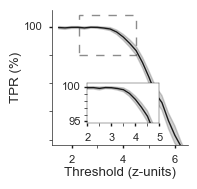

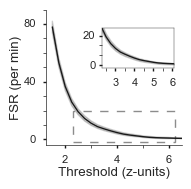

/home/shayok/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.


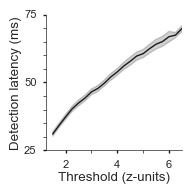

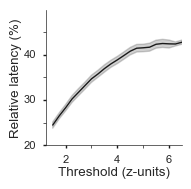

ValueError: x and y must have same first dimension

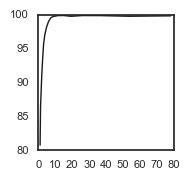

In [478]:
################# TOP PANEL
#TP RATE vs THRESHOLD

#main plot
ax = plt.gca()
tsplot(ax,data=tpRateCalc1,x=1.5+(np.ones(tpRateCalc1.shape[0])*np.arange(0,tpRateCalc1.shape[0])*0.25),color=SINGLECHANNELCOLOR)
plt.xlabel("Threshold (z-units)")
plt.ylabel("TPR (%)")

#spine width
[i.set_linewidth(0.5) for i in ax.spines.values()]

#ticks
ax.set_xticks(np.arange(2,7,2))
minorLocator = AutoMinorLocator(2)
ax.xaxis.set_minor_locator(minorLocator)
ax.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
ax.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

ax.set_yticks(np.arange(50,110,25))
minorLocator = AutoMinorLocator(5)
ax.yaxis.set_minor_locator(minorLocator)
ax.yaxis.tick_left()
ax.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
ax.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

plt.ylim(tpRateLim)
plt.xlim(thresholdLim)

#inset location
ax.add_patch(
    patches.Rectangle(
        (2.3,95), #(x,y)
        4.5-2.3, #width
        102-95,       #height
        color='k',
        lw=1,
        ls='--',
        alpha=0.5,
        fill=False
    )
)

#inset
axins = inset_axes(parent_axes=ax,
                    width=0.72,
                    height=0.4,
                    loc=5,
                    bbox_to_anchor=(0.84, 0.365),
                    bbox_transform=ax.figure.transFigure,
                    borderpad=2,
                  )
tsplot(axins,data=tpRateCalc1,x=1.5+(np.ones(tpRateCalc1.shape[0])*np.arange(0,tpRateCalc1.shape[0])*0.25),color=SINGLECHANNELCOLOR)
axins.set_ylim(95,102)
axins.set_xlim(2.3,4.5)
axins.set_xticks(np.arange(2,4.5,1))
axins.set_yticks(np.arange(94,102,2))
#spine width
[i.set_linewidth(0.3) for i in axins.spines.values()]
#ticks
plt.minorticks_on()

axins.set_xlim(2.3,5)
axins.set_xticks(np.arange(2,6,1))
minorLocator = AutoMinorLocator(2)
axins.xaxis.set_minor_locator(minorLocator)
axins.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
axins.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

axins.set_ylim(94.75,100.5)
axins.set_yticks(np.arange(95,102,5))
minorLocator = AutoMinorLocator(5)
axins.yaxis.set_minor_locator(minorLocator)
axins.yaxis.tick_left()
axins.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
axins.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

# plt.savefig('/home/shayok/Desktop/test.svg',transparent=True)

if saveFigs:
    plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/tpThresh.svg',transparent=True)
plt.show()

#FALSE STIM RATE vs THRESHOLD
#main plot
ax = plt.gca()
tsplot(ax,data=fpRateCalc1,x=1.5+(np.ones(fpRateCalc1.shape[0])*np.arange(0,fpRateCalc1.shape[0])*0.25),color=SINGLECHANNELCOLOR)
plt.xlabel("Threshold (z-units)")
plt.ylabel("FSR (per min)")

#spine width
[i.set_linewidth(0.5) for i in ax.spines.values()]

#ticks
ax.set_xticks(np.arange(2,7,2))
minorLocator = AutoMinorLocator(2)
ax.xaxis.set_minor_locator(minorLocator)
ax.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
ax.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

ax.set_yticks(np.arange(0,85,40))
minorLocator = AutoMinorLocator(4)
ax.yaxis.set_minor_locator(minorLocator)
ax.yaxis.tick_left()
ax.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
ax.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

plt.ylim(fsRateLim)
plt.xlim(thresholdLim)

#mark inset
ax.add_patch(
    patches.Rectangle(
        (2.3,-2), #(x,y)
        6.25-2.3, #width
        20+2,       #height
        color='k',
        lw=1,
        ls='--',
        alpha=0.5,
        fill=False
    )
)

#inset
axins = inset_axes(parent_axes=ax,
                    width=0.72,
                    height=0.4,
                    loc=5,
                    bbox_to_anchor=(0.96, 0.68), 
                    bbox_transform=ax.figure.transFigure,
                    borderpad=2,
                  )
tsplot(axins,data=fpRateCalc1,x=1.5+(np.ones(fpRateCalc1.shape[0])*np.arange(0,fpRateCalc1.shape[0])*0.25),color=SINGLECHANNELCOLOR)
axins.set_ylim(-2,20)
axins.set_xlim(2.3,6.25)
axins.set_xticks(np.arange(3,6.25,1))

#ticks!
plt.minorticks_on()

axins.set_xlim(2.3,6.1)
axins.set_xticks(np.arange(3,6.1,1))
minorLocator = AutoMinorLocator(2)
axins.xaxis.set_minor_locator(minorLocator)
axins.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
axins.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

axins.set_ylim(-2,25)
axins.set_yticks(np.arange(0,26,20))
minorLocator = AutoMinorLocator(3)
axins.yaxis.set_minor_locator(minorLocator)
axins.yaxis.tick_left()
axins.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
axins.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

#spine width
[i.set_linewidth(0.3) for i in axins.spines.values()]

if saveFigs:
    plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/fpThresh.svg',transparent=True)
plt.show()

#DETECTION LATENCY vs THRESHOLD
ax=plt.gca()
tsplot(ax,data=detectionLatencyCalc1,x=1.5+(np.ones(fpRateCalc1.shape[0])*np.arange(0,fpRateCalc1.shape[0])*0.25),color=SINGLECHANNELCOLOR)
plt.xlabel("Threshold (z-units)")
plt.ylabel("Detection latency (ms)")

#spine width
[i.set_linewidth(0.5) for i in ax.spines.values()]

#ticks
ax.set_xticks(np.arange(2,7,2))
minorLocator = AutoMinorLocator(2)
ax.xaxis.set_minor_locator(minorLocator)
ax.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
ax.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

ax.set_yticks(np.arange(25,76,25))
minorLocator = AutoMinorLocator(5)
ax.yaxis.set_minor_locator(minorLocator)
ax.yaxis.tick_left()
ax.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
ax.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

plt.xlim(thresholdLim)
plt.ylim(detectionLatencyLim)

plt.legend(loc='lower right')
if saveFigs:
    plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/latThresh.svg',transparent=True)
plt.show()

#RELATIVE DETECTION LATENCY vs THRESHOLD
ax=plt.gca()
tsplot(ax,data=relativeDetectionLatencyCalc1,x=1.5+(np.ones(fpRateCalc1.shape[0])*np.arange(0,fpRateCalc1.shape[0])*0.25),color=SINGLECHANNELCOLOR)
plt.xlabel("Threshold (z-units)")
plt.ylabel("Relative latency (%)")

#spine width
[i.set_linewidth(0.5) for i in ax.spines.values()]

#ticks
ax.set_xticks(np.arange(2,7,2))
minorLocator = AutoMinorLocator(2)
ax.xaxis.set_minor_locator(minorLocator)
ax.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
ax.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

ax.set_yticks(np.arange(20,46,10))
minorLocator = AutoMinorLocator(2)
ax.yaxis.set_minor_locator(minorLocator)
ax.yaxis.tick_left()
ax.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
ax.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

# plt.ylim([20,60])
plt.xlim(thresholdLim)
plt.legend(loc='lower right')
if saveFigs:
    plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/relativeLatThresh.svg',transparent=True)
plt.show()


########### BOTTOM PANEL
#linewidths
shade_widths = 1

#calculate 95% confidence intervals
data = fpRateCalc1
cis_fpr = [np.percentile(data,2.5,axis=1),np.percentile(data,97.5,axis=1)]

data = tpRateCalc1
cis_tpr = [np.percentile(data,2.5,axis=1),np.percentile(data,97.5,axis=1)]

data = detectionLatencyCalc1
cis_lat = [np.percentile(data,2.5,axis=1),np.percentile(data,97.5,axis=1)]

#TP vs FALSE STIM RATE
ax = plt.gca()
plt.plot(est_fpr,est_tpr,color='k')
plt.plot(est_fpr,cis_tpr[0],linestyle=':',color='k')
plt.plot(est_fpr,cis_tpr[1],linestyle=':',color='k')
plt.fill_betweenx(est_tpr,cis_fpr[0],cis_fpr[1],linewidth=shade_widths,alpha=0.2,color='k')

plt.xlabel("FSR (per min)")
plt.ylabel("TPR (%)")

#spine width
[i.set_linewidth(0.5) for i in ax.spines.values()]

#ticks
ax.set_xticks(np.arange(0,85,40))
minorLocator = AutoMinorLocator(4)
ax.xaxis.set_minor_locator(minorLocator)
ax.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
ax.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

ax.set_yticks(np.arange(50,110,25))
minorLocator = AutoMinorLocator(5)
ax.yaxis.set_minor_locator(minorLocator)
ax.yaxis.tick_left()
ax.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
ax.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

plt.ylim(tpRateLim)
plt.xlim(fsRateLim)
# mark_inset
ax.add_patch(
    patches.Rectangle(
        (-2,95), #(x,y)
        26+2, #width
        100.5-95,       #height
        color='k',
        lw=1,
        ls='--',
        alpha=0.5,
        fill=False
    )
)
axins = inset_axes(parent_axes=ax,
                    width=0.72,
                    height=0.4,
                    loc=5,
                    bbox_to_anchor=(0.9, 0.37), 
                    bbox_transform=ax.figure.transFigure,
                    borderpad=2,
                  )

axins.plot(est_fpr,est_tpr,color='k')
axins.plot(est_fpr,cis_tpr[0],linestyle=':',color='k')
axins.plot(est_fpr,cis_tpr[1],linestyle=':',color='k')
axins.fill_betweenx(est_tpr,cis_fpr[0],cis_fpr[1],linewidth=shade_widths,alpha=0.2,color='k')

#spine width
[i.set_linewidth(0.3) for i in axins.spines.values()]

#ticks!
plt.minorticks_on()

axins.set_xlim(-2,26)
axins.set_xticks(np.arange(0,25,20))
minorLocator = AutoMinorLocator(4)
axins.xaxis.set_minor_locator(minorLocator)
axins.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
axins.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

axins.set_ylim(95,100.5)
axins.set_yticks(np.arange(95,100.5,5))
minorLocator = AutoMinorLocator(5)
axins.yaxis.set_minor_locator(minorLocator)
axins.yaxis.tick_left()
axins.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
axins.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

if saveFigs:
    plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/tpFsr.svg',transparent=True)
plt.show()
est_lat=np.mean(detectionLatencyCalc1,axis=1)
est_fpr=np.mean(fpRateCalc1,axis=1)
est_tpr=np.mean(tpRateCalc1,axis=1)
# TP vs DETECTION LATENCY
ax = plt.gca()
plt.plot(est_lat,est_tpr,color='k')
plt.plot(est_lat,cis_tpr[0],linestyle=':',color='k')
plt.plot(est_lat,cis_tpr[1],linestyle=':',color='k')
plt.fill_betweenx(est_tpr,cis_lat[0],cis_lat[1],linewidth=shade_widths,alpha=0.2,color='k')

plt.xlabel("Detection latency (ms)")
plt.ylabel("TPR (%)")

#spine width
[i.set_linewidth(0.5) for i in ax.spines.values()]

#ticks 
ax.set_xticks(np.arange(25,76,25))
minorLocator = AutoMinorLocator(5)
ax.xaxis.set_minor_locator(minorLocator)
ax.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
ax.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

ax.set_yticks(np.arange(50,110,25))
minorLocator = AutoMinorLocator(5)
ax.yaxis.set_minor_locator(minorLocator)
ax.yaxis.tick_left()
ax.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
ax.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

plt.ylim(tpRateLim)
plt.xlim(detectionLatencyLim)

#zoom 
ax.add_patch(
    patches.Rectangle(
        (40,95), #(x,y)
        60-40, #width
        100.5-95,       #height
        color='k',
        lw=1,
        ls='--',
        alpha=0.5,
        fill=False
    )
)

axins = inset_axes(parent_axes=ax,
                    width=0.72,
                    height=0.4,
                    loc=5,
                    bbox_to_anchor=(0.85, 0.37), 
                    bbox_transform=ax.figure.transFigure,
                    borderpad=2,
                  )

axins.plot(est_lat,est_tpr,color='k')
axins.plot(est_lat,cis_tpr[0],linestyle=':',color='k')
axins.plot(est_lat,cis_tpr[1],linestyle=':',color='k')
axins.fill_betweenx(est_tpr,cis_lat[0],cis_lat[1],linewidth=shade_widths,alpha=0.2,color='k')

#spine width
[i.set_linewidth(0.3) for i in axins.spines.values()]

#ticks!
plt.minorticks_on()

axins.set_xlim(40,60)
axins.set_xticks(np.arange(40,61,10))
minorLocator = AutoMinorLocator(2)
axins.xaxis.set_minor_locator(minorLocator)
axins.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
axins.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

axins.set_ylim(95,100.5)
axins.set_yticks(np.arange(95,100.5,5))
minorLocator = AutoMinorLocator(5)
axins.yaxis.set_minor_locator(minorLocator)
axins.yaxis.tick_left()
axins.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
axins.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

if saveFigs:
    plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/latTP.svg',transparent=True)
plt.show()

# FP STIM RATE vs DETECTION LATENCY
ax = plt.gca()
plt.plot(est_lat,est_fpr,color='k')
plt.plot(est_lat,cis_fpr[0],linestyle=':',color='k')
plt.plot(est_lat,cis_fpr[1],linestyle=':',color='k')
plt.fill_betweenx(est_fpr,cis_lat[0],cis_lat[1],linewidth=shade_widths,alpha=0.2,color='k')

plt.xlabel("Detection latency (ms)")
plt.ylabel("FSR (per min)")

#spine width
[i.set_linewidth(0.5) for i in ax.spines.values()]

#ticks 
ax.set_xticks(np.arange(25,76,25))
minorLocator = AutoMinorLocator(5)
ax.xaxis.set_minor_locator(minorLocator)
ax.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
ax.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

ax.set_yticks(np.arange(0,85,40))
minorLocator = AutoMinorLocator(4)
ax.yaxis.set_minor_locator(minorLocator)
ax.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
ax.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

plt.ylim(fsRateLim)
plt.xlim(detectionLatencyLim)

#zoom
ax.add_patch(
    patches.Rectangle(
        (40,-2), #(x,y)
        60-40, #width
        28+2,       #height
        color='k',
        lw=1,
        ls='--',
        alpha=0.5,
        fill=False
    )
)
axins = inset_axes(parent_axes=ax,
                    width=0.72,
                    height=0.4,
                    loc=5,
                    bbox_to_anchor=(0.95, 0.7), 
                    bbox_transform=ax.figure.transFigure,
                    borderpad=2,
                  )

axins.plot(est_lat,est_fpr,color='k')
axins.plot(est_lat,cis_fpr[0],linestyle=':',color='k')
axins.plot(est_lat,cis_fpr[1],linestyle=':',color='k')
axins.fill_betweenx(est_fpr,cis_lat[0],cis_lat[1],linewidth=shade_widths,alpha=0.2,color='k')

#spine width
[i.set_linewidth(0.3) for i in axins.spines.values()]

#ticks!
plt.minorticks_on()

axins.set_xlim(40,60)
axins.set_xticks(np.arange(40,61,10))
minorLocator = AutoMinorLocator(2)
axins.xaxis.set_minor_locator(minorLocator)
axins.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
axins.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

axins.set_ylim(-2,28)
axins.set_yticks(np.arange(0,28,20))
minorLocator = AutoMinorLocator(4)
axins.yaxis.set_minor_locator(minorLocator)
axins.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
axins.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

if saveFigs:
    plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/latFPStim.svg',transparent=True)
plt.show()

# Ripple Epochs Distribution plot

# 3 SD

In [26]:
rippleBounds  = np.asarray([np.loadtxt("/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/singleChanAnalysis/rippleBoundsStart3SD.out"),\
                            np.loadtxt("/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/singleChanAnalysis/rippleBoundsEnd3SD.out")]).T
rippleBounds.shape

(1380, 2)

In [27]:
ripple_epochs3SD = nel.EpochArray(rippleBounds/3000)
ripple_epochs3SD

<EpochArray at 0x7fc587945080: 1,380 epochs> of duration 2:50:925 minutes

In [28]:
(np.where(ripple_epochs3SD.durations<0.450)[0].size+np.where(ripple_epochs3SD.durations<0.0)[0].size)/ripple_epochs3SD.n_epochs

0.9963768115942029

/home/shayok/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


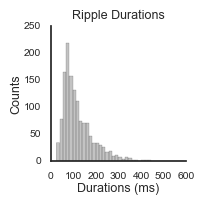

In [29]:
sns.set(rc={'figure.figsize': (1.75,1.75),'lines.linewidth': 1, 'font.size': 9, 'axes.labelsize': 9, 'axes.titlesize':9, 'legend.fontsize': 6.4, 'ytick.labelsize': 7.5, 'xtick.labelsize': 7.5, 'svg.fonttype' : 'none', 'axes.labelpad' : 1.2 })
sns.set_style('white')
sns.set_color_codes(palette='deep')
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

ax = sns.distplot(ripple_epochs3SD.durations*1000,color='dimgray',kde=False)

# ax.set_xlim([0,450])
# ax.set_xticks(np.arange(0,500,100))
# minorLocator = AutoMinorLocator(2)
# ax.xaxis.set_minor_locator(minorLocator)
# ax.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
# ax.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

# ax.set_yticks(np.arange(0,120,50))
# minorLocator = AutoMinorLocator(2)
# ax.yaxis.set_minor_locator(minorLocator)
# ax.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
# ax.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

ax.set_title("Ripple Durations")
ax.set_xlabel("Durations (ms)")
ax.set_ylabel("Counts")

# if saveFigs:
#     plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/RippleDist.svg',transparent=True)

## 4 SD

In [30]:
rippleBounds  = np.asarray([np.loadtxt("/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/singleChanAnalysis/rippleBoundsStart4SD.out"),\
                            np.loadtxt("/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/singleChanAnalysis/rippleBoundsEnd4SD.out")]).T
rippleBounds.shape

(1041, 2)

In [31]:
ripple_epochs4SD = nel.EpochArray(rippleBounds/3000)
ripple_epochs4SD

<EpochArray at 0x7fc587945630: 1,041 epochs> of duration 2:19:982 minutes

In [32]:
(np.where(ripple_epochs4SD.durations<0.450)[0].size+np.where(ripple_epochs4SD.durations<0.0)[0].size)/ripple_epochs4SD.n_epochs

0.9971181556195965

/home/shayok/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


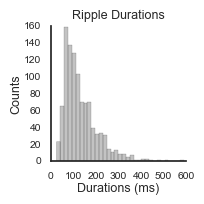

In [33]:
sns.set(rc={'figure.figsize': (1.75,1.75),'lines.linewidth': 1, 'font.size': 9, 'axes.labelsize': 9, 'axes.titlesize':9, 'legend.fontsize': 6.4, 'ytick.labelsize': 7.5, 'xtick.labelsize': 7.5, 'svg.fonttype' : 'none', 'axes.labelpad' : 1.2 })
sns.set_style('white')
sns.set_color_codes(palette='deep')
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

ax = sns.distplot(ripple_epochs4SD.durations*1000,color='dimgray',kde=False)

# ax.set_xlim([0,450])
# ax.set_xticks(np.arange(0,500,100))
# minorLocator = AutoMinorLocator(2)
# ax.xaxis.set_minor_locator(minorLocator)
# ax.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
# ax.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

# ax.set_yticks(np.arange(0,120,50))
# minorLocator = AutoMinorLocator(2)
# ax.yaxis.set_minor_locator(minorLocator)
# ax.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
# ax.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

ax.set_title("Ripple Durations")
ax.set_xlabel("Durations (ms)")
ax.set_ylabel("Counts")

# if saveFigs:
#     plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/RippleDist.svg',transparent=True)

## 5 SD

In [34]:
rippleBounds  = np.asarray([np.loadtxt("/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/singleChanAnalysis/rippleBoundsStart5SD.out"),\
                            np.loadtxt("/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/singleChanAnalysis/rippleBoundsEnd5SD.out")]).T
rippleBounds.shape

(809, 2)

In [35]:
ripple_epochs5SD = nel.EpochArray(rippleBounds/3000)
ripple_epochs5SD

<EpochArray at 0x7fc583ac0b00: 809 epochs> of duration 1:55:743 minutes

In [36]:
(np.where(ripple_epochs5SD.durations<0.450)[0].size+np.where(ripple_epochs5SD.durations<0.0)[0].size)/ripple_epochs5SD.n_epochs

0.9962917181705809

/home/shayok/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


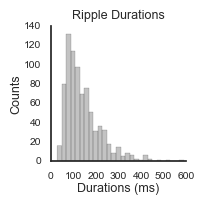

In [37]:
sns.set(rc={'figure.figsize': (1.75,1.75),'lines.linewidth': 1, 'font.size': 9, 'axes.labelsize': 9, 'axes.titlesize':9, 'legend.fontsize': 6.4, 'ytick.labelsize': 7.5, 'xtick.labelsize': 7.5, 'svg.fonttype' : 'none', 'axes.labelpad' : 1.2 })
sns.set_style('white')
sns.set_color_codes(palette='deep')
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

ax = sns.distplot(ripple_epochs5SD.durations*1000,color='dimgray',kde=False)

# ax.set_xlim([0,450])
# ax.set_xticks(np.arange(0,500,100))
# minorLocator = AutoMinorLocator(2)
# ax.xaxis.set_minor_locator(minorLocator)
# ax.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
# ax.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

# ax.set_yticks(np.arange(0,120,50))
# minorLocator = AutoMinorLocator(2)
# ax.yaxis.set_minor_locator(minorLocator)
# ax.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
# ax.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

ax.set_title("Ripple Durations")
ax.set_xlabel("Durations (ms)")
ax.set_ylabel("Counts")

# if saveFigs:
#     plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/RippleDist.svg',transparent=True)

## Combined plot

/home/shayok/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


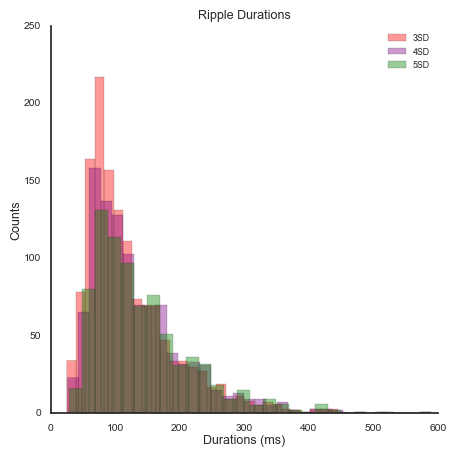

In [43]:
sns.set(rc={'figure.figsize': (5,5),'lines.linewidth': 1, 'font.size': 9, 'axes.labelsize': 9, 'axes.titlesize':9, 'legend.fontsize': 6.4, 'ytick.labelsize': 7.5, 'xtick.labelsize': 7.5, 'svg.fonttype' : 'none', 'axes.labelpad' : 1.2 })
sns.set_style('white')
sns.set_color_codes(palette='deep')
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

ax = sns.distplot(ripple_epochs3SD.durations*1000,color='red',kde=False,label="3SD")
ax = sns.distplot(ripple_epochs4SD.durations*1000,color='purple',kde=False,label='4SD')
ax = sns.distplot(ripple_epochs5SD.durations*1000,color='green',kde=False,label="5SD")
ax.legend()

# ax.set_xlim([0,450])
# ax.set_xticks(np.arange(0,500,100))
# minorLocator = AutoMinorLocator(2)
# ax.xaxis.set_minor_locator(minorLocator)
# ax.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
# ax.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

# ax.set_yticks(np.arange(0,120,50))
# minorLocator = AutoMinorLocator(2)
# ax.yaxis.set_minor_locator(minorLocator)
# ax.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
# ax.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

ax.set_title("Ripple Durations")
ax.set_xlabel("Durations (ms)")
ax.set_ylabel("Counts")

# if saveFigs:
#     plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/RippleDist.svg',transparent=True)

In [53]:
saveFigs = True

/home/shayok/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


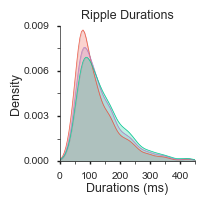

In [62]:
sns.set(rc={'figure.figsize': (1.75,1.75),'lines.linewidth': 1, 'font.size': 9, 'axes.labelsize': 9, 'axes.titlesize':9, 'legend.fontsize': 6.4, 'ytick.labelsize': 7.5, 'xtick.labelsize': 7.5, 'svg.fonttype' : 'none', 'axes.labelpad' : 1.2 })
sns.set_style('white')
sns.set_color_codes(palette='deep')
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

ax = sns.distplot(ripple_epochs3SD.durations*1000,color=npl.colors.sweet.red,kde=True,hist=False,kde_kws = {'shade': True, 'linewidth': 0.5})
ax = sns.distplot(ripple_epochs4SD.durations*1000,color=npl.colors.sweet.purple,kde=True,hist=False,kde_kws = {'shade': True, 'linewidth': 0.5})
ax = sns.distplot(ripple_epochs5SD.durations*1000,color=npl.colors.sweet.green,kde=True,hist=False,kde_kws = {'shade': True, 'linewidth': 0.5})

#spine width
[i.set_linewidth(0.5) for i in ax.spines.values()]

#x axis
ax.set_xlim([0,450])
ax.set_xticks(np.arange(0,500,100))
minorLocator = AutoMinorLocator(2)
ax.xaxis.set_minor_locator(minorLocator)
ax.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
ax.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

#y axis
ax.set_yticks(np.arange(0,0.012,0.003))
minorLocator = AutoMinorLocator(2)
ax.yaxis.set_minor_locator(minorLocator)
ax.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
ax.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

ax.set_title("Ripple Durations")
ax.set_xlabel("Durations (ms)")
ax.set_ylabel("Density")

if saveFigs:
    plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/RippleDists.svg',transparent=True)

# Combined 3-5 sd + 15 ms canonicals

In [505]:
sigmuhz = np.arange(1.5,10.25,0.25)
# sigmuhz = sigmuhz[10:29]
detectionLatencyCalc1_5sd = []
relativeDetectionLatencyCalc1_5sd = []
fpRateCalc1_5sd = []
tpRateCalc1_5sd = []
# fpPercentCalc1_5sd = []
for z in tqdm(sigmuhz):
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/figureData/Figure5/singleChan5SD/detectionLatency" + str((int)(z*100)) + ".out" 
    detectionLatencyCalc1_5sd.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/figureData/Figure5/singleChan5SD/relativeDetectionLatency" + str((int)(z*100)) + ".out" 
    relativeDetectionLatencyCalc1_5sd.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/figureData/Figure5/singleChan5SD/fpRate" + str((int)(z*100)) + ".out" 
    fpRateCalc1_5sd.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/figureData/Figure5/singleChan5SD/tpRate" + str((int)(z*100)) + ".out" 
    tpRateCalc1_5sd.append(np.loadtxt(OPENME))
#     OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/singleChanDefn/fpPercent" + str((int)(z*100)) + ".out" 
#     fpPercentCalc1_5sd.append(np.loadtxt(OPENME))
detectionLatencyCalc1_5sd = np.asarray(detectionLatencyCalc1_5sd)
relativeDetectionLatencyCalc1_5sd = np.asarray(relativeDetectionLatencyCalc1_5sd)
fpRateCalc1_5sd = np.asarray(fpRateCalc1_5sd)
tpRateCalc1_5sd = np.asarray(tpRateCalc1_5sd)

tpRateCalc1_5sd *= 100
relativeDetectionLatencyCalc1_5sd *= 100

est_lat5sd=np.mean(detectionLatencyCalc1_5sd,axis=1)
est_fpr5sd=np.mean(fpRateCalc1_5sd,axis=1)
est_tpr5sd=np.mean(tpRateCalc1_5sd,axis=1)

#linewidths
shade_widths = 1

#calculate 95% confidence intervals
data = fpRateCalc1_5sd
cis_fpr5sd = [np.percentile(data,2.5,axis=1),np.percentile(data,97.5,axis=1)]

data = tpRateCalc1_5sd
cis_tpr5sd = [np.percentile(data,2.5,axis=1),np.percentile(data,97.5,axis=1)]

data = detectionLatencyCalc1_5sd
cis_lat5sd = [np.percentile(data,2.5,axis=1),np.percentile(data,97.5,axis=1)]

100%|██████████| 35/35 [00:00<00:00, 58.00it/s]


In [506]:
sigmuhz = np.arange(1.5,10.25,0.25)
# sigmuhz = sigmuhz[6:25]
detectionLatencyCalc1_4sd = []
relativeDetectionLatencyCalc1_4sd = []
fpRateCalc1_4sd = []
tpRateCalc1_4sd = []
for z in tqdm(sigmuhz):
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/figureData/Figure5/singleChan4SD/detectionLatency" + str((int)(z*100)) + ".out" 
    detectionLatencyCalc1_4sd.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/figureData/Figure5/singleChan4SD/relativeDetectionLatency" + str((int)(z*100)) + ".out" 
    relativeDetectionLatencyCalc1_4sd.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/figureData/Figure5/singleChan4SD/fpRate" + str((int)(z*100)) + ".out" 
    fpRateCalc1_4sd.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/figureData/Figure5/singleChan4SD/tpRate" + str((int)(z*100)) + ".out" 
    tpRateCalc1_4sd.append(np.loadtxt(OPENME))
detectionLatencyCalc1_4sd = np.asarray(detectionLatencyCalc1_4sd)
relativeDetectionLatencyCalc1_4sd = np.asarray(relativeDetectionLatencyCalc1_4sd)
fpRateCalc1_4sd = np.asarray(fpRateCalc1_4sd)
tpRateCalc1_4sd = np.asarray(tpRateCalc1_4sd)

tpRateCalc1_4sd *= 100
relativeDetectionLatencyCalc1_4sd *= 100

est_lat4sd=np.mean(detectionLatencyCalc1_4sd,axis=1)
est_fpr4sd=np.mean(fpRateCalc1_4sd,axis=1)
est_tpr4sd=np.mean(tpRateCalc1_4sd,axis=1)

#linewidths
shade_widths = 1

#calculate 95% confidence intervals
data = fpRateCalc1_4sd
cis_fpr4sd = [np.percentile(data,2.5,axis=1),np.percentile(data,97.5,axis=1)]

data = tpRateCalc1_4sd
cis_tpr4sd = [np.percentile(data,2.5,axis=1),np.percentile(data,97.5,axis=1)]

data = detectionLatencyCalc1_4sd
cis_lat4sd = [np.percentile(data,2.5,axis=1),np.percentile(data,97.5,axis=1)]

100%|██████████| 35/35 [00:00<00:00, 58.35it/s]


In [507]:
sigmuhz = np.arange(1.5,10.25,0.25)
detectionLatencyCalc1 = []
relativeDetectionLatencyCalc1 = []
fpRateCalc1 = []
tpRateCalc1 = []
# fpPercentCalc1 = []
for z in tqdm(sigmuhz):
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/figureData/Figure5/singleChanDefn3SD/detectionLatency" + str((int)(z*100)) + ".out" 
    detectionLatencyCalc1.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/figureData/Figure5/singleChanDefn3SD/relativeDetectionLatency" + str((int)(z*100)) + ".out" 
    relativeDetectionLatencyCalc1.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/figureData/Figure5/singleChanDefn3SD/fpRate" + str((int)(z*100)) + ".out" 
    fpRateCalc1.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/figureData/Figure5/singleChanDefn3SD/tpRate" + str((int)(z*100)) + ".out" 
    tpRateCalc1.append(np.loadtxt(OPENME))
#     OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/singleChanDefn/fpPercent" + str((int)(z*100)) + ".out" 
#     fpPercentCalc1.append(np.loadtxt(OPENME))
detectionLatencyCalc1 = np.asarray(detectionLatencyCalc1)
relativeDetectionLatencyCalc1 = np.asarray(relativeDetectionLatencyCalc1)
fpRateCalc1 = np.asarray(fpRateCalc1)
tpRateCalc1 = np.asarray(tpRateCalc1)
# fpPercentCalc1 = np.asarray(fpPercentCalc1)

tpRateCalc1 *= 100
relativeDetectionLatencyCalc1 *= 100

est_lat=np.mean(detectionLatencyCalc1,axis=1)
est_fpr=np.mean(fpRateCalc1,axis=1)
est_tpr=np.mean(tpRateCalc1,axis=1)

#calculate 95% confidence intervals
data = fpRateCalc1
cis_fpr = [np.percentile(data,2.5,axis=1),np.percentile(data,97.5,axis=1)]

data = tpRateCalc1
cis_tpr = [np.percentile(data,2.5,axis=1),np.percentile(data,97.5,axis=1)]

data = detectionLatencyCalc1
cis_lat = [np.percentile(data,2.5,axis=1),np.percentile(data,97.5,axis=1)]

100%|██████████| 35/35 [00:00<00:00, 59.02it/s]


In [552]:
sns.set(rc={'figure.figsize': (1.75,1.75),'lines.linewidth': 1, 'font.size': 9.6, 'axes.labelsize': 9.6, 'axes.titlesize':9.6, 'legend.fontsize': 6.4, 'ytick.labelsize': 8, 'xtick.labelsize': 8, 'svg.fonttype' : 'none', 'axes.labelpad' : 1.2 })
sns.set_style('white')
sns.set_color_codes(palette='deep')
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
saveFigs = True

tpRateLim = [79,103]
thresholdLim = [1.25,6.5]
thresholdLim10 = [1.25,10.5]
detectionLatencyLim = [25,101]
fsRateLim = [-4,90]
alfa=0.1
SINGLECHANNELCOLOR = 'k'

## Top Panel

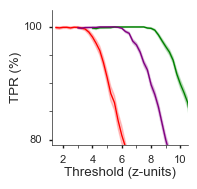

In [564]:
#TP RATE vs THRESHOLD

#main plot
ax = plt.gca()
tsplot(ax,data=tpRateCalc1,x=start3sd+(np.ones(tpRateCalc1.shape[0])*np.arange(0,tpRateCalc1.shape[0])*0.25),color='red')
tsplot(ax,data=tpRateCalc1_5sd,x=start5sd+(np.ones(tpRateCalc1_5sd.shape[0])*np.arange(0,tpRateCalc1_5sd.shape[0])*0.25),color='green')
tsplot(ax,data=tpRateCalc1_4sd,x=start4sd+(np.ones(tpRateCalc1_4sd.shape[0])*np.arange(0,tpRateCalc1_4sd.shape[0])*0.25),color='purple')
plt.xlabel("Threshold (z-units)")
plt.ylabel("TPR (%)")


#spine width
[i.set_linewidth(0.5) for i in ax.spines.values()]

#ticks
ax.set_xticks(np.arange(2,11,2))
minorLocator = AutoMinorLocator(2)
ax.xaxis.set_minor_locator(minorLocator)
ax.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
ax.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

ax.set_yticks(np.arange(60,110,20))
minorLocator = AutoMinorLocator(4)
ax.yaxis.set_minor_locator(minorLocator)
ax.yaxis.tick_left()
ax.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
ax.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

plt.ylim(tpRateLim)
plt.xlim(thresholdLim10)

# #inset location
# ax.add_patch(
#     patches.Rectangle(
#         (2.3,95), #(x,y)
#         4.5-2.3, #width
#         102-95,       #height
#         color='k',
#         lw=1,
#         ls='--',
#         alpha=0.5,
#         fill=False
#     )
# )

#inset
# axins = inset_axes(parent_axes=ax,
#                     width=0.72,
#                     height=0.4,
#                     loc=5,
#                     bbox_to_anchor=(0.84, 0.365),
#                     bbox_transform=ax.figure.transFigure,
#                     borderpad=2,
#                   )
# tsplot(axins,data=tpRateCalc1,x=1.5+(np.ones(tpRateCalc1.shape[0])*np.arange(0,tpRateCalc1.shape[0])*0.25),color=SINGLECHANNELCOLOR)
# tsplot(axins,data=tpRateCalc1_5sd,x=1.5+(np.ones(tpRateCalc1_5sd.shape[0])*np.arange(0,tpRateCalc1_5sd.shape[0])*0.25),color='red')
# axins.set_ylim(95,102)
# axins.set_xlim(2.3,4.5)
# axins.set_xticks(np.arange(2,4.5,1))
# axins.set_yticks(np.arange(94,102,2))
# #spine width
# [i.set_linewidth(0.3) for i in axins.spines.values()]
# #ticks
# plt.minorticks_on()

# axins.set_xlim(2.3,5)
# axins.set_xticks(np.arange(2,6,1))
# minorLocator = AutoMinorLocator(2)
# axins.xaxis.set_minor_locator(minorLocator)
# axins.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
# axins.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

# axins.set_ylim(94.75,100.5)
# axins.set_yticks(np.arange(95,102,5))
# minorLocator = AutoMinorLocator(5)
# axins.yaxis.set_minor_locator(minorLocator)
# axins.yaxis.tick_left()
# axins.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
# axins.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

if saveFigs:
    plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/tpThresh.svg',transparent=True)
plt.show()

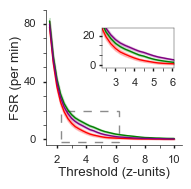

In [566]:
#FALSE STIM RATE vs THRESHOLD
#main plot
ax = plt.gca()
tsplot(ax,data=fpRateCalc1,x=1.5+(np.ones(fpRateCalc1.shape[0])*np.arange(0,fpRateCalc1.shape[0])*0.25),color='red')
tsplot(ax,data=fpRateCalc1_5sd,x=1.5+(np.ones(fpRateCalc1_5sd.shape[0])*np.arange(0,fpRateCalc1_5sd.shape[0])*0.25),color='green')
tsplot(ax,data=fpRateCalc1_4sd,x=1.5+(np.ones(fpRateCalc1_4sd.shape[0])*np.arange(0,fpRateCalc1_4sd.shape[0])*0.25),color='purple')
plt.xlabel("Threshold (z-units)")
plt.ylabel("FSR (per min)")

#spine width
[i.set_linewidth(0.5) for i in ax.spines.values()]

#ticks
ax.set_xticks(np.arange(2,11,2))
minorLocator = AutoMinorLocator(2)
ax.xaxis.set_minor_locator(minorLocator)
ax.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
ax.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

ax.set_yticks(np.arange(0,85,40))
minorLocator = AutoMinorLocator(4)
ax.yaxis.set_minor_locator(minorLocator)
ax.yaxis.tick_left()
ax.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
ax.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

plt.ylim(fsRateLim)
plt.xlim(thresholdLim10)

#mark inset
ax.add_patch(
    patches.Rectangle(
        (2.3,-2), #(x,y)
        6.25-2.3, #width
        20+2,       #height
        color='k',
        lw=1,
        ls='--',
        alpha=0.5,
        fill=False
    )
)

#inset
axins = inset_axes(parent_axes=ax,
                    width=0.72,
                    height=0.4,
                    loc=5,
                    bbox_to_anchor=(0.96, 0.68), 
                    bbox_transform=ax.figure.transFigure,
                    borderpad=2,
                  )
tsplot(axins,data=fpRateCalc1,x=1.5+(np.ones(fpRateCalc1.shape[0])*np.arange(0,fpRateCalc1.shape[0])*0.25),color='red')
tsplot(axins,data=fpRateCalc1_4sd,x=1.5+(np.ones(fpRateCalc1_4sd.shape[0])*np.arange(0,fpRateCalc1_4sd.shape[0])*0.25),color='green')
tsplot(axins,data=fpRateCalc1_5sd,x=1.5+(np.ones(fpRateCalc1_5sd.shape[0])*np.arange(0,fpRateCalc1_5sd.shape[0])*0.25),color='purple')
axins.set_ylim(-2,20)
axins.set_xlim(2.3,6.25)
axins.set_xticks(np.arange(3,6.25,1))

#ticks!
plt.minorticks_on()

axins.set_xlim(2.3,6.1)
axins.set_xticks(np.arange(3,6.1,1))
minorLocator = AutoMinorLocator(2)
axins.xaxis.set_minor_locator(minorLocator)
axins.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
axins.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

axins.set_ylim(-2,25)
axins.set_yticks(np.arange(0,26,20))
minorLocator = AutoMinorLocator(3)
axins.yaxis.set_minor_locator(minorLocator)
axins.yaxis.tick_left()
axins.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
axins.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

#spine width
[i.set_linewidth(0.3) for i in axins.spines.values()]

if saveFigs:
    plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/fpThresh.svg',transparent=True)
plt.show()

/home/shayok/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.


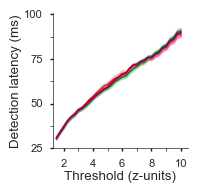

In [567]:
#DETECTION LATENCY vs THRESHOLD
ax=plt.gca()
tsplot(ax,data=detectionLatencyCalc1,x=1.5+(np.ones(fpRateCalc1.shape[0])*np.arange(0,fpRateCalc1.shape[0])*0.25),color='red')
tsplot(ax,data=detectionLatencyCalc1_5sd,x=1.5+(np.ones(fpRateCalc1_5sd.shape[0])*np.arange(0,fpRateCalc1_5sd.shape[0])*0.25),color='green')
tsplot(ax,data=detectionLatencyCalc1_4sd,x=1.5+(np.ones(fpRateCalc1_4sd.shape[0])*np.arange(0,fpRateCalc1_4sd.shape[0])*0.25),color='purple')
plt.xlabel("Threshold (z-units)")
plt.ylabel("Detection latency (ms)")

#spine width
[i.set_linewidth(0.5) for i in ax.spines.values()]

#ticks
ax.set_xticks(np.arange(2,11,2))
minorLocator = AutoMinorLocator(2)
ax.xaxis.set_minor_locator(minorLocator)
ax.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
ax.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

ax.set_yticks(np.arange(25,101,25))
minorLocator = AutoMinorLocator(2)
ax.yaxis.set_minor_locator(minorLocator)
ax.yaxis.tick_left()
ax.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
ax.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

plt.xlim(thresholdLim10)
plt.ylim(detectionLatencyLim)

plt.legend(loc='lower right')
if saveFigs:
    plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/latThresh.svg',transparent=True)
plt.show()

/home/shayok/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.


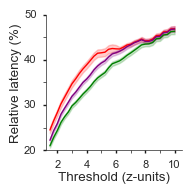

In [568]:
#RELATIVE DETECTION LATENCY vs THRESHOLD
ax=plt.gca()
tsplot(ax,data=relativeDetectionLatencyCalc1,x=1.5+(np.ones(fpRateCalc1.shape[0])*np.arange(0,fpRateCalc1.shape[0])*0.25),color='red')
tsplot(ax,data=relativeDetectionLatencyCalc1_5sd,x=1.5+(np.ones(fpRateCalc1_5sd.shape[0])*np.arange(0,fpRateCalc1_5sd.shape[0])*0.25),color='green')
tsplot(ax,data=relativeDetectionLatencyCalc1_4sd,x=1.5+(np.ones(fpRateCalc1_4sd.shape[0])*np.arange(0,fpRateCalc1_4sd.shape[0])*0.25),color='purple')
plt.xlabel("Threshold (z-units)")
plt.ylabel("Relative latency (%)")

#spine width
[i.set_linewidth(0.5) for i in ax.spines.values()]

#ticks
ax.set_xticks(np.arange(2,11,2))
minorLocator = AutoMinorLocator(2)
ax.xaxis.set_minor_locator(minorLocator)
ax.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
ax.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

ax.set_yticks(np.arange(20,51,10))
minorLocator = AutoMinorLocator(2)
ax.yaxis.set_minor_locator(minorLocator)
ax.yaxis.tick_left()
ax.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
ax.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

# plt.ylim([20,60])
plt.xlim(thresholdLim10)
plt.legend(loc='lower right')
if saveFigs:
    plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/relativeLatThresh.svg',transparent=True)
plt.show()


## Bottom Panel

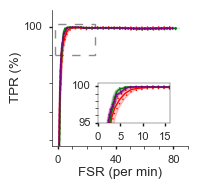

In [581]:
#TP vs FALSE STIM RATE
ax = plt.gca()
plt.plot(est_fpr,est_tpr,color='red')
plt.plot(est_fpr,cis_tpr[0],linestyle=':',color='red')
plt.plot(est_fpr,cis_tpr[1],linestyle=':',color='red')
plt.fill_betweenx(est_tpr,cis_fpr[0],cis_fpr[1],linewidth=shade_widths,alpha=0.2,color='red')

plt.plot(est_fpr5sd,est_tpr5sd,color='green')
plt.plot(est_fpr5sd,cis_tpr5sd[0],linestyle=':',color='green')
plt.plot(est_fpr5sd,cis_tpr5sd[1],linestyle=':',color='green')
plt.fill_betweenx(est_tpr5sd,cis_fpr5sd[0],cis_fpr5sd[1],linewidth=shade_widths,alpha=0.2,color='green')

plt.plot(est_fpr4sd,est_tpr4sd,color='purple')
plt.plot(est_fpr4sd,cis_tpr4sd[0],linestyle=':',color='purple')
plt.plot(est_fpr4sd,cis_tpr4sd[1],linestyle=':',color='purple')
plt.fill_betweenx(est_tpr4sd,cis_fpr4sd[0],cis_fpr4sd[1],linewidth=shade_widths,alpha=0.2,color='purple')

plt.xlabel("FSR (per min)")
plt.ylabel("TPR (%)")

#spine width
[i.set_linewidth(0.5) for i in ax.spines.values()]

#ticks
ax.set_xticks(np.arange(0,85,40))
minorLocator = AutoMinorLocator(4)
ax.xaxis.set_minor_locator(minorLocator)
ax.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
ax.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

ax.set_yticks(np.arange(50,110,25))
minorLocator = AutoMinorLocator(5)
ax.yaxis.set_minor_locator(minorLocator)
ax.yaxis.tick_left()
ax.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
ax.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

plt.ylim(tpRateLim)
plt.xlim(fsRateLim)
# mark_inset
ax.add_patch(
    patches.Rectangle(
        (-2,95), #(x,y)
        26+2, #width
        100.5-95,       #height
        color='k',
        lw=1,
        ls='--',
        alpha=0.5,
        fill=False
    )
)
axins = inset_axes(parent_axes=ax,
                    width=0.72,
                    height=0.4,
                    loc=5,
                    bbox_to_anchor=(0.9, 0.37), 
                    bbox_transform=ax.figure.transFigure,
                    borderpad=2,
                  )

axins.plot(est_fpr,est_tpr,color='red')
axins.plot(est_fpr,cis_tpr[0],linestyle=':',color='red')
axins.plot(est_fpr,cis_tpr[1],linestyle=':',color='red')
axins.fill_betweenx(est_tpr,cis_fpr[0],cis_fpr[1],linewidth=shade_widths,alpha=0.2,color='red')

axins.plot(est_fpr5sd,est_tpr5sd,color='green')
axins.plot(est_fpr5sd,cis_tpr5sd[0],linestyle=':',color='green')
axins.plot(est_fpr5sd,cis_tpr5sd[1],linestyle=':',color='green')
axins.fill_betweenx(est_tpr5sd,cis_fpr5sd[0],cis_fpr5sd[1],linewidth=shade_widths,alpha=0.2,color='green')

axins.plot(est_fpr4sd,est_tpr4sd,color='purple')
axins.plot(est_fpr4sd,cis_tpr4sd[0],linestyle=':',color='purple')
axins.plot(est_fpr4sd,cis_tpr4sd[1],linestyle=':',color='purple')
axins.fill_betweenx(est_tpr4sd,cis_fpr4sd[0],cis_fpr4sd[1],linewidth=shade_widths,alpha=0.2,color='purple')

#spine width
[i.set_linewidth(0.3) for i in axins.spines.values()]

#ticks!
plt.minorticks_on()

axins.set_xlim(0,16)
axins.set_xticks(np.arange(0,16,5))
minorLocator = AutoMinorLocator(1)
axins.xaxis.set_minor_locator(minorLocator)
axins.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
axins.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

axins.set_ylim(95,100.5)
axins.set_yticks(np.arange(95,100.5,5))
minorLocator = AutoMinorLocator(5)
axins.yaxis.set_minor_locator(minorLocator)
axins.yaxis.tick_left()
axins.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
axins.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

if saveFigs:
    plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/tpFsr.svg',transparent=True)
plt.show()

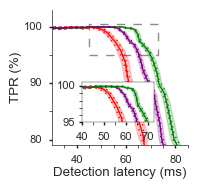

In [622]:
detectionLatencyLim = [30,85]
# TP vs DETECTION LATENCY
ax = plt.gca()
plt.plot(est_lat,est_tpr,color='red')
plt.plot(est_lat,cis_tpr[0],linestyle=':',color='red')
plt.plot(est_lat,cis_tpr[1],linestyle=':',color='red')
plt.fill_betweenx(est_tpr,cis_lat[0],cis_lat[1],linewidth=shade_widths,alpha=0.2,color='red')

plt.plot(est_lat5sd,est_tpr5sd,color='green')
plt.plot(est_lat5sd,cis_tpr5sd[0],linestyle=':',color='green')
plt.plot(est_lat5sd,cis_tpr5sd[1],linestyle=':',color='green')
plt.fill_betweenx(est_tpr5sd,cis_lat5sd[0],cis_lat5sd[1],linewidth=shade_widths,alpha=0.2,color='green')

plt.plot(est_lat4sd,est_tpr4sd,color='purple')
plt.plot(est_lat4sd,cis_tpr4sd[0],linestyle=':',color='purple')
plt.plot(est_lat4sd,cis_tpr4sd[1],linestyle=':',color='purple')
plt.fill_betweenx(est_tpr4sd,cis_lat4sd[0],cis_lat4sd[1],linewidth=shade_widths,alpha=0.2,color='purple')

plt.xlabel("Detection latency (ms)")
plt.ylabel("TPR (%)")

#spine width
[i.set_linewidth(0.5) for i in ax.spines.values()]

#ticks 
ax.set_xticks(np.arange(40,101,20))
minorLocator = AutoMinorLocator(4)
ax.xaxis.set_minor_locator(minorLocator)
ax.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
ax.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

ax.set_yticks(np.arange(80,110,10))
minorLocator = AutoMinorLocator(2)
ax.yaxis.set_minor_locator(minorLocator)
ax.yaxis.tick_left()
ax.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
ax.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

plt.ylim(tpRateLim)
plt.xlim(np.asarray(detectionLatencyLim))

#zoom 
ax.add_patch(
    patches.Rectangle(
        (45,95), #(x,y)
        73-45, #width
        100.5-95,       #height
        color='k',
        lw=1,
        ls='--',
        alpha=0.5,
        fill=False
    )
)

axins = inset_axes(parent_axes=ax,
                    width=0.72,
                    height=0.4,
                    loc=5,
                    bbox_to_anchor=(0.81, 0.37), 
                    bbox_transform=ax.figure.transFigure,
                    borderpad=2,
                  )

axins.plot(est_lat,est_tpr,color='red')
axins.plot(est_lat,cis_tpr[0],linestyle=':',color='red')
axins.plot(est_lat,cis_tpr[1],linestyle=':',color='red')
axins.fill_betweenx(est_tpr,cis_lat[0],cis_lat[1],linewidth=shade_widths,alpha=0.2,color='red')


axins.plot(est_lat4sd,est_tpr4sd,color='purple')
axins.plot(est_lat4sd,cis_tpr4sd[0],linestyle=':',color='purple')
axins.plot(est_lat4sd,cis_tpr4sd[1],linestyle=':',color='purple')
axins.fill_betweenx(est_tpr4sd,cis_lat4sd[0],cis_lat4sd[1],linewidth=shade_widths,alpha=0.2,color='purple')

axins.plot(est_lat5sd,est_tpr5sd,color='green')
axins.plot(est_lat5sd,cis_tpr5sd[0],linestyle=':',color='green')
axins.plot(est_lat5sd,cis_tpr5sd[1],linestyle=':',color='green')
axins.fill_betweenx(est_tpr5sd,cis_lat5sd[0],cis_lat5sd[1],linewidth=shade_widths,alpha=0.2,color='green')

#spine width
[i.set_linewidth(0.3) for i in axins.spines.values()]

#ticks!
plt.minorticks_on()

axins.set_xlim(45,73)
axins.set_xticks(np.arange(40,71,10))
minorLocator = AutoMinorLocator(2)
axins.xaxis.set_minor_locator(minorLocator)
axins.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
axins.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

axins.set_ylim(95,100.5)
axins.set_yticks(np.arange(95,100.5,5))
minorLocator = AutoMinorLocator(5)
axins.yaxis.set_minor_locator(minorLocator)
axins.yaxis.tick_left()
axins.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
axins.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

if saveFigs:
    plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/latTP.svg',transparent=True)
plt.show()

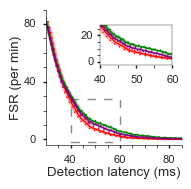

In [630]:
# FP STIM RATE vs DETECTION LATENCY
detectionLatencyLim = [30,85]
ax = plt.gca()
plt.plot(est_lat,est_fpr,color='red')
plt.plot(est_lat,cis_fpr[0],linestyle=':',color='red')
plt.plot(est_lat,cis_fpr[1],linestyle=':',color='red')
plt.fill_betweenx(est_fpr,cis_lat[0],cis_lat[1],linewidth=shade_widths,alpha=0.2,color='red')

plt.plot(est_lat5sd,est_fpr5sd,color='green')
plt.plot(est_lat5sd,cis_fpr5sd[0],linestyle=':',color='green')
plt.plot(est_lat5sd,cis_fpr5sd[1],linestyle=':',color='green')
plt.fill_betweenx(est_fpr5sd,cis_lat5sd[0],cis_lat5sd[1],linewidth=shade_widths,alpha=0.2,color='green')

plt.plot(est_lat4sd,est_fpr4sd,color='purple')
plt.plot(est_lat4sd,cis_fpr4sd[0],linestyle=':',color='purple')
plt.plot(est_lat4sd,cis_fpr4sd[1],linestyle=':',color='purple')
plt.fill_betweenx(est_fpr4sd,cis_lat4sd[0],cis_lat4sd[1],linewidth=shade_widths,alpha=0.2,color='purple')

plt.xlabel("Detection latency (ms)")
plt.ylabel("FSR (per min)")

#spine width
[i.set_linewidth(0.5) for i in ax.spines.values()]

#ticks 
ax.set_xticks(np.arange(40,101,20))
minorLocator = AutoMinorLocator(4)
ax.xaxis.set_minor_locator(minorLocator)
ax.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
ax.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

ax.set_yticks(np.arange(0,85,40))
minorLocator = AutoMinorLocator(4)
ax.yaxis.set_minor_locator(minorLocator)
ax.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
ax.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

plt.ylim(fsRateLim)
plt.xlim(detectionLatencyLim)

#zoom
ax.add_patch(
    patches.Rectangle(
        (40,-2), #(x,y)
        60-40, #width
        28+2,       #height
        color='k',
        lw=1,
        ls='--',
        alpha=0.5,
        fill=False
    )
)
axins = inset_axes(parent_axes=ax,
                    width=0.72,
                    height=0.4,
                    loc=5,
                    bbox_to_anchor=(0.95, 0.7), 
                    bbox_transform=ax.figure.transFigure,
                    borderpad=2,
                  )

axins.plot(est_lat,est_fpr,color='red')
axins.plot(est_lat,cis_fpr[0],linestyle=':',color='red')
axins.plot(est_lat,cis_fpr[1],linestyle=':',color='red')
axins.fill_betweenx(est_fpr,cis_lat[0],cis_lat[1],linewidth=shade_widths,alpha=0.2,color='red')

axins.plot(est_lat5sd,est_fpr4sd,color='purple')
axins.plot(est_lat5sd,cis_fpr4sd[0],linestyle=':',color='purple')
axins.plot(est_lat5sd,cis_fpr4sd[1],linestyle=':',color='purple')
axins.fill_betweenx(est_fpr4sd,cis_lat4sd[0],cis_lat4sd[1],linewidth=shade_widths,alpha=0.2,color='purple')

axins.plot(est_lat5sd,est_fpr5sd,color='green')
axins.plot(est_lat5sd,cis_fpr5sd[0],linestyle=':',color='green')
axins.plot(est_lat5sd,cis_fpr5sd[1],linestyle=':',color='green')
axins.fill_betweenx(est_fpr5sd,cis_lat5sd[0],cis_lat5sd[1],linewidth=shade_widths,alpha=0.2,color='green')

#spine width
[i.set_linewidth(0.3) for i in axins.spines.values()]

#ticks!
plt.minorticks_on()

axins.set_xlim(40,60)
axins.set_xticks(np.arange(40,61,10))
minorLocator = AutoMinorLocator(2)
axins.xaxis.set_minor_locator(minorLocator)
axins.tick_params(axis='x',which='minor',top='off',length=2,width=0.5,color='k')
axins.tick_params(axis='x',which='major',top='off',length=2,width=1,color='k')

axins.set_ylim(-2,28)
axins.set_yticks(np.arange(0,28,20))
minorLocator = AutoMinorLocator(4)
axins.yaxis.set_minor_locator(minorLocator)
axins.tick_params(axis='y',which='minor',right='off',direction='out',length=2,width=0.5,color='k',)
axins.tick_params(axis='y',which='major',right='off',direction='out',length=2,width=1,color='k',pad=5)

if saveFigs:
    plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/latFPStim.svg',transparent=True)
plt.show()

# Final Figure!

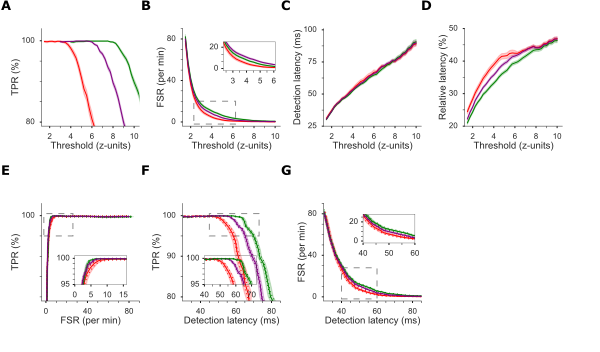

In [631]:
#create new SVG figure
fig = sg.SVGFigure("6.25in", "3.67in")

#load matplotlib-generated figures
tpThresh = sg.fromfile("/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/tpThresh.svg")
fsrThresh = sg.fromfile('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/fpThresh.svg')
relDetThresh = sg.fromfile('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/relativeLatThresh.svg')
latThresh = sg.fromfile('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/latThresh.svg')
tpLat = sg.fromfile('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/latTP.svg')
fsrLat = sg.fromfile('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/latFPStim.svg')
tpFsr = sg.fromfile('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/tpFsr.svg')

#get the plot objects
##Top Panel
tpThreshPlot1 = tpThresh.getroot()
fsrThreshPlot2 = fsrThresh.getroot()
relDetThreshPlot4 = relDetThresh.getroot()
latThreshPlot3 = latThresh.getroot()

plotspacing = 141
plotInitLoc = 26
plotVerticalDisplacement = 16
plotSecondRow = 175+16
textspacing = 140
textInitLoc = 1
textVerticalDisplacement = 10
textSecondRow = 175

tpThreshPlot1.moveto(plotInitLoc, plotVerticalDisplacement, scale=1)
fsrThreshPlot2.moveto(plotspacing+plotInitLoc, plotVerticalDisplacement, scale=1)
latThreshPlot3.moveto(plotspacing+plotspacing+plotInitLoc, plotVerticalDisplacement, scale=1)
relDetThreshPlot4.moveto(plotspacing+plotspacing+plotspacing+plotInitLoc, plotVerticalDisplacement, scale=1)

##Bottom Panel
tpLatPlot1 = tpLat.getroot()
fsrLatPlot2 = fsrLat.getroot()
tpFsrPlot3 = tpFsr.getroot()
tpFsrPlot3.moveto(plotInitLoc, plotSecondRow, scale=1)
tpLatPlot1.moveto(plotspacing+plotInitLoc, plotSecondRow, scale=1)
fsrLatPlot2.moveto(plotspacing+plotspacing+plotInitLoc, plotSecondRow, scale=1)


#add text labels
##Top :Panel
txt1 = sg.TextElement(1,textVerticalDisplacement, "A", size=13, weight="bold")
txt2 = sg.TextElement(textspacing+textInitLoc,textVerticalDisplacement, "B", size=13, weight="bold")
txt3 = sg.TextElement(textspacing+textspacing+textInitLoc,textVerticalDisplacement,"C", size=13, weight='bold')
txt4 = sg.TextElement(textspacing+textspacing+textspacing+textInitLoc,textVerticalDisplacement,"D", size=13, weight='bold')
##Middle :Panel
txt5 = sg.TextElement(1,textSecondRow, "E", size=13, weight="bold")
txt6 = sg.TextElement(textspacing+textInitLoc,textSecondRow, "F", size=13, weight="bold")
txt7 = sg.TextElement(textspacing+textspacing+textInitLoc,textSecondRow,"G", size=13, weight='bold')


# append plots and labels to figure
fig.append([tpThreshPlot1, fsrThreshPlot2, latThreshPlot3, relDetThreshPlot4, tpLatPlot1, fsrLatPlot2, tpFsrPlot3])
fig.append([txt1, txt2, txt3, txt4, txt5, txt6, txt7,])


fig.save("/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/fig5Final.svg")
os.system("inkscape --export-pdf=/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/fig5Final.pdf /home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/fig5Final.svg")
os.system("inkscape --export-png=/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/fig5Final.png /home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/fig5Final.svg")
display(Image(filename='/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/fig5Final.png'))

# Clean SVG and add ripple epoch plot! 
SVGUtils modifies things a little bit from matplotlib...I need a better pipeline for this for future figures

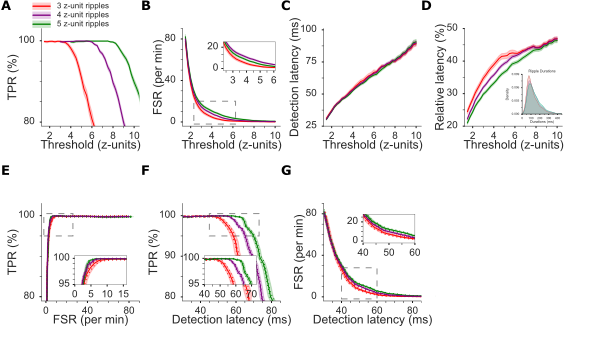

In [64]:
os.system("inkscape --export-pdf=/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/fig5Final.pdf /home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/fig5Final.svg")
os.system("inkscape --export-png=/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/fig5Final.png /home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/fig5Final.svg")
display(Image(filename='/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig5_singlechanmetrics/fig5Final.png'))